In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns  #plot
#statsmodel
import statsmodels.api as sm
#SCIKIT-LEARN
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv(r"C:\Users\nency\Downloads\car_data.csv", index_col="User ID")
data.head()

,Gender,Age,AnnualSalary,Purchased
User ID,,,,
385,Male,35,20000,0
681,Male,40,43500,0
353,Male,49,74000,0
895,Male,40,107500,1
661,Male,25,79000,0


In [3]:
#discrete choice model
#logistic, multinomial, nested, ordered

In [4]:
#Binary Logistic Regression
#dependent varaible takes value from 1 or 0. In this case we can't use the CLRM.It will not be distributed in the whole graph.
#we get sigmoid function: s shaped function
#finding the log odds of something to happen or not happen
#two ways to do it in python

In [5]:
data.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [6]:
data.isnull()

,Gender,Age,AnnualSalary,Purchased
User ID,,,,
385,False,False,False,False
681,False,False,False,False
353,False,False,False,False
895,False,False,False,False
661,False,False,False,False
...,...,...,...,...
863,False,False,False,False
800,False,False,False,False
407,False,False,False,False


In [7]:
data=data.dropna()
data.head()

,Gender,Age,AnnualSalary,Purchased
User ID,,,,
385,Male,35,20000,0
681,Male,40,43500,0
353,Male,49,74000,0
895,Male,40,107500,1
661,Male,25,79000,0


In [8]:
data.isnull().any()

Gender          False
Age             False
AnnualSalary    False
Purchased       False
dtype: bool

In [9]:
data['Genderd']=data['Gender'].replace({'Male':0,'Female':1})
data=data.drop('Gender',axis=1)
data.head()
#axis=1 is columns and axis=0 is row

,Age,AnnualSalary,Purchased,Genderd
User ID,,,,
385,35,20000,0,0
681,40,43500,0,0
353,49,74000,0,0
895,40,107500,1,0
661,25,79000,0,0


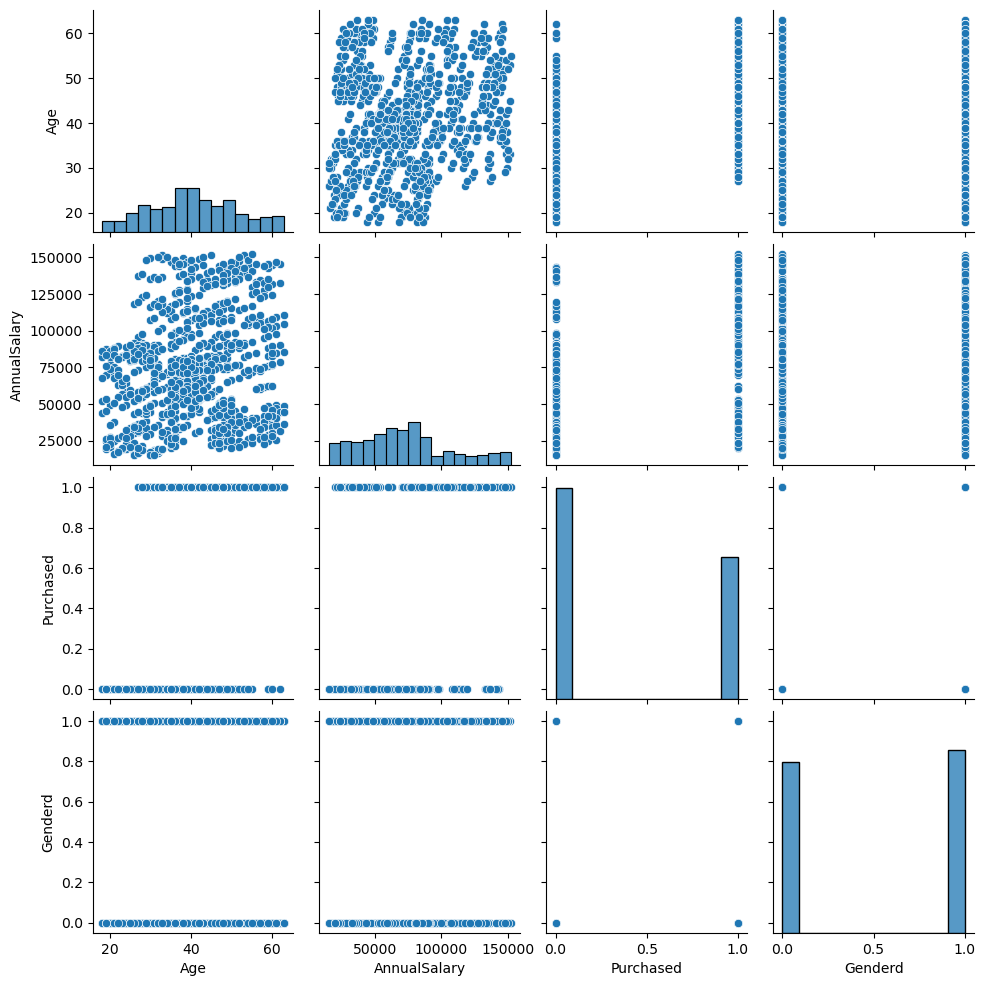

In [10]:
sns.pairplot(data)

In [11]:
data.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'AnnualSalary'}>],
       [<AxesSubplot:title={'center':'Purchased'}>,
        <AxesSubplot:title={'center':'Genderd'}>]], dtype=object)

In [12]:
y=data['Purchased']
X=data[['Genderd','Age','AnnualSalary']]

In [13]:
X=sm.add_constant(X)
log_reg=sm.Logit(y,X, data=data).fit()
log_reg.summary()
#print(log_reg.summary())
#we are looking athe log odds, the value of intercept and other will be converted in to the probability values which will fall in between 0 and 1; 
#in logistic regression we dont interpret the coefficient the way be do in linear regression. 

E:\python\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)
E:\python\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully.
         Current function value: 0.371479
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 May 2023   Pseudo R-squ.:                  0.4487
Time:                        23:32:31   Log-Likelihood:                -371.48
converged:                       True   LL-Null:                       -673.81
Covariance Type:            nonrobust   LLR p-value:                9.794e-131
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -11.8603      0.774    -15.324      0.000     -13.377     -10.343
Genderd         -0.3184      0.186     -1.716      0.086      -0.682       0.045
Age              0.2195      0.015     14.471      0.000       0.190       0.249
AnnualSalary   3.37e-05   3.23e-06     10.426      0.000    2.74e-05       4e-05
================================================================================
"""

In [14]:
odds_ratios=pd.DataFrame(
{
    "OR":log_reg.params,
    "Lower CI":log_reg.conf_int()[0],
    "Upper CI":log_reg.conf_int()[1],
}
)
odds_ratios=np.exp(odds_ratios)
print(odds_ratios)

                    OR  Lower CI  Upper CI
const         0.000007  0.000002  0.000032
Genderd       0.727287  0.505587  1.046202
Age           1.245452  1.208972  1.283034
AnnualSalary  1.000034  1.000027  1.000040


In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
X=data.iloc[:,[0,1,3]]
y=data.iloc[:,2]
#[row:,columns]
X.head()

,Age,AnnualSalary,Genderd
User ID,,,
385,35,20000,0
681,40,43500,0
353,49,74000,0
895,40,107500,0
661,25,79000,0


In [17]:
#feature scaling to normalise the range of independent 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.47711966, -1.52849808, -1.03252879],
       [-0.00990495, -0.84676745, -1.03252879],
       [ 0.83108153,  0.03803187, -1.03252879],
       ...,
       [-1.13122026,  1.90916486,  0.968496  ],
       [ 0.73763859,  1.77862069,  0.968496  ],
       [ 0.36386682,  0.02352696,  0.968496  ]])

In [18]:
#splitting the data into test and train
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [19]:
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [20]:
model1.intercept_

array([-0.82933291])

In [21]:
y_pred=model1.predict(X_test)
results=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
results

,Actual,Predicted
User ID,,
176,0,0
448,1,1
391,0,0
623,1,0
773,0,1
...,...,...
66,1,1
539,0,0
71,0,0


In [22]:
plt.scatter(y_test,y_pred)

In [23]:
model1.coef_

array([[ 2.28948262,  1.17504272, -0.2684774 ]])

In [24]:
model1.predict_proba(X)

array([[0.96894747, 0.03105253],
       [0.8277533 , 0.1722467 ],
       [0.19856084, 0.80143916],
       ...,
       [0.80782066, 0.19217934],
       [0.06360092, 0.93639908],
       [0.55691235, 0.44308765]])

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [26]:
cnf_matrix=confusion_matrix(y_test, y_pred)
cnf_matrix

array([[157,  15],
       [ 42,  86]], dtype=int64)

In [27]:
sns.heatmap(pd.DataFrame(cnf_matrix), cmap="coolwarm", annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Text(331.0700483091788, 0.5, 'Actual label')

In [28]:
#accuracy
#TN+TP/(TN+TP+FP+FN)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.81

In [29]:
#Precision
#out of all the positive predicted, what percentage is truly positive
#precision=TP/(TP+FP)
precision=precision_score(y_test,y_pred)
precision

0.8514851485148515

In [30]:
#recall
#out of the total postive, what percentage are predicted positive
#recall=TP/(TP+FN)
recall=recall_score(y_test,y_pred)
recall

0.671875

In [31]:
#f1 score
#a harmonic mean of the precison and recalll'#best value 1 , worst 0
#F1=2*(precision*recall)/(precison+recall)
f1=f1_score(y_test,y_pred)
f1

0.7510917030567686

In [32]:
#panada.create_dummies